#NLP Analysis - Part 2

Introduction

We investigated two different datasets using natural language processing and machine learning methods in this study. The first set of data was a compilation of reviews from various Tower Hamlets restaurants, with star ratings ranging from one to five. The second set of data was a compilation of movie reviews with binary sentiment labels obtained from the IMDb website and made available on Kaggle.(N, 2019)

We previously sought to ascertain whether the terminology and rating system used to discuss dining experiences accurately reflected the reviews' overall impressions and opinions. We collected data from Yelp restaurant reviews in London, Tower Hamlets, and Cardiff and found that VAD scores of review texts and subjective evaluations of food and restaurants on a 1-5 rating scale are consistent across locations. For the purpose of this study we used the data obtained from Tower Hamlets and performed additional analysis to gain a better understanding of how this works.

Process


We tested four different machine learning algorithms after preprocessing the data: logistic regression, linear SVM, multinomial NB, and decision tree classifier. The Logistic Regression model produced the most correct answers (53.33%). Then, using a technique known as LDA topic modelling, we determined the most relevant topics hidden within the text data. With a coherence score of 0.22096, the model suggests that the topics may not be that dissimilar. We were finally able to extract named entities from the previously preprocessed text data using spaCy.



During the investigation's second phase, we examined a dataset of 50,000 movie reviews with binary sentiment labels. We began by preprocessing the data, cleaning the text, removing stop words and special characters, lemmatizing, stemming, and removing any duplicate reviews. Then, four machine learning algorithms were used: logistic regression, linear SVM, multinomial Naive Bayes, and decision tree classifier. The Linear SVM model had the highest level of accuracy (88.91%).

We were finally able to extract named entities from the previously preprocessed text data using spaCy. According to the analysis' findings, the vast majority of the movie reviews in the dataset were positive. This finding is consistent with the high ratings given to the films in the rating system analysis. This could imply that people are more likely to post a review of a movie when they have a favourable opinion of it.

Conclusion:

Our analasys sugests that techniques like machine learning and natural language processing could be used to extract information from customer reviews for businesses like restaurants and movies. There is a correlation between the rating system and the sentiment expressed in the reviews, as seen in both sets of data.  The machine learning algorithms used in this study were able to accurately predict the sentiment of movie and restaurant reviews, with the Linear SVM model achieving the best results in the movie review dataset. One can improve their ability to gain insights into the topics discussed in the reviews by preprocessing the text and using Spacy to extract named entities. In general, our data analysis findings provide insights into sentiment analysis through the use of natural language processing and machine learning techniques. These findings, in turn, can help businesses and industries improve the products and services they offer.




References:
N, L. (2019) IMDB dataset of 50K movie reviews, Kaggle. Available at: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews (Accessed: March 15, 2023). 

** 1.Multiclass Semantic Analysis**

***Importing Libraries***


In [ ]:
import pandas  as pd
from io import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import re,string,unicodedata
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [ ]:
data_path = "/content/tower_hamlets_restaurant_reviews.csv"
data = pd.read_csv(data_path)

***Exploring Data***


In [ ]:
col = ['text', 'rating']
data = data[col]
data.columns =['text', 'rating']

In [ ]:
data.head()

,text,rating
0,The antithesis of Dishoom in the best way poss...,4
1,Heard this place could have long waits in the ...,4
2,Suggested as a must-visit for Indian food whil...,4
3,"Wonderful place, great atmosphere, friendly he...",4
4,the food here is great. highly recommend reser...,5


In [ ]:
data.shape

(3000, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3000 non-null   object
 1   rating  3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


Text(0.5, 1.0, 'Sentiment distribution')

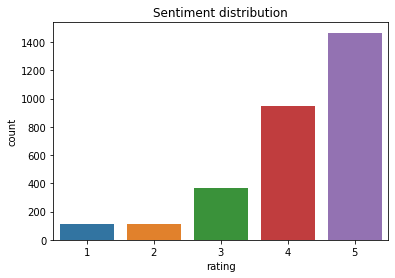

In [ ]:
sns.countplot(data['rating'])
plt.title("Sentiment distribution")

In [ ]:
# let's define function to count number of words in each review

def count_words(text):
  words = text.split()
  num_words = len(words)
  return num_words

In [ ]:
data['word count'] = data['text'].apply(count_words)
data.head()

,text,rating,word count
0,The antithesis of Dishoom in the best way poss...,4,27
1,Heard this place could have long waits in the ...,4,32
2,Suggested as a must-visit for Indian food whil...,4,25
3,"Wonderful place, great atmosphere, friendly he...",4,16
4,the food here is great. highly recommend reser...,5,31


**Preprocessing**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('sentiwordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [ ]:
# define function to clean the reviews

def preprocess(text):
  soup = BeautifulSoup(text, "html.parser") #Removing the html strips
  text = soup.get_text()
  text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
  text = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*', "", text, flags = re.MULTILINE)  #Removing emails 
  text = re.sub('\[[^]]*\]', '', text)  #Removing the square brackets
  text = re.sub(r'[^a-zA-z0-9\s]', '', text)  #Removing special character and keep only words and numbers

  stop_words = set(stopwords.words('english'))
  punctuation = string.punctuation

  # Define a lemmatizer
  lemmatizer = nltk.WordNetLemmatizer()

  # Remove punctuation
  text = text.translate(str.maketrans('', '', punctuation))
  # Convert to lowercase
  text = text.lower()

  # Tokenize the text 
  text_tokens = word_tokenize(text)

  words = [w for w in text_tokens if not w in stop_words]  #Removing stop words

  # Lemmatize the words
  words = [lemmatizer.lemmatize(word) for word in words]

  new_text = " ".join(words)

  ps = nltk.porter.PorterStemmer()  #Stemming the text
  new_text = ' '.join([ps.stem(word) for word in new_text.split()])
  return new_text

In [ ]:
# let's apply it on reviews
data.text = data['text'].apply(preprocess)

In [ ]:
# Define a tokenizer function that uses the preprocessed_text column
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Apply the tokenizer function to the preprocessed_text column
data['tokenized_text'] = data.text.apply(tokenize_text)

# Define a lemmatizer
lemmatizer = nltk.WordNetLemmatizer()

# Define a function to lemmatize the tokens
def lemmatize_tokens(tokens):
    # Lemmatize the tokens
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmas

# Apply the lemmatizer to the tokenized_text column
data['lemmatized_tokens'] = data['tokenized_text'].apply(lemmatize_tokens)
# Save the updated DataFrame to a CSV file
# Save the updated DataFrame to a CSV file
data.to_csv('tower_hamlets_restaurant_reviews_lematized&tokenizded.csv', index=False)


In [ ]:
# check duplicated after preprocessing
duplicated_count = data['text'].duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  0


In [ ]:
# let's drop all duplicated reviews
data = data.drop_duplicates('text')

In [ ]:
# let's count the words in each review again
data['new word count'] = data['text'].apply(count_words)

In [ ]:
data.head()

,text,rating,word count,tokenized_text,lemmatized_tokens,new word count
0,antithesi dishoom best way possibl im biggest ...,4,27,"[antithesi, dishoom, best, way, possibl, im, b...","[antithesi, dishoom, best, way, possibl, im, b...",15
1,heard place could long wait even came open noo...,4,32,"[heard, place, could, long, wait, even, came, ...","[heard, place, could, long, wait, even, came, ...",15
2,suggest mustvisit indian food london tayyab di...,4,25,"[suggest, mustvisit, indian, food, london, tay...","[suggest, mustvisit, indian, food, london, tay...",16
3,wonder place great atmospher friendli help inf...,4,16,"[wonder, place, great, atmospher, friendli, he...","[wonder, place, great, atmospher, friendli, he...",15
4,food great highli recommend reserv v wait 2030...,5,31,"[food, great, highli, recommend, reserv, v, wa...","[food, great, highli, recommend, reserv, v, wa...",15


In [ ]:
#word cloud for positive review words
fivestar_reviews =  data[data.rating == 5]
fivestar_reviews.head()

,text,rating,word count,tokenized_text,lemmatized_tokens,new word count
4,food great highli recommend reserv v wait 2030...,5,31,"[food, great, highli, recommend, reserv, v, wa...","[food, great, highli, recommend, reserv, v, wa...",15
5,read one popular restaur london deserv titl ja...,5,31,"[read, one, popular, restaur, london, deserv, ...","[read, one, popular, restaur, london, deserv, ...",12
6,restaur interest cocktail menu order bollybeli...,5,26,"[restaur, interest, cocktail, menu, order, bol...","[restaur, interest, cocktail, menu, order, bol...",14
7,worth hype dont wait line make sure get reserv...,5,28,"[worth, hype, dont, wait, line, make, sure, ge...","[worth, hype, dont, wait, line, make, sure, ge...",17
8,tri place trip london absolut love best food i...,5,31,"[tri, place, trip, london, absolut, love, best...","[tri, place, trip, london, absolut, love, best...",17


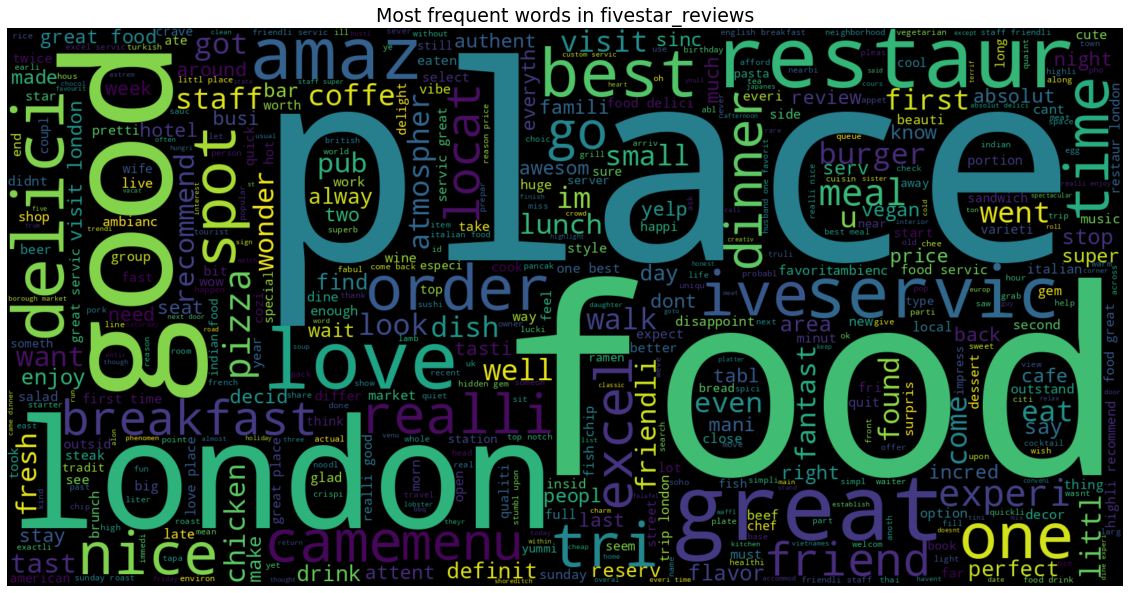

In [ ]:
text = ' '.join([word for word in fivestar_reviews['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in fivestar_reviews', fontsize = 19)
plt.show()

In [ ]:
#word cloud for negitive review words
onestar_reviews =  data[data.rating == 1]
onestar_reviews.head()

,text,rating,word count,tokenized_text,lemmatized_tokens,new word count
86,ive excit come great review final made trip su...,1,28,"[ive, excit, come, great, review, final, made,...","[ive, excit, come, great, review, final, made,...",14
128,love vacat park pond menu offer sound good giv...,1,34,"[love, vacat, park, pond, menu, offer, sound, ...","[love, vacat, park, pond, menu, offer, sound, ...",14
136,order butter chicken graini could eat main din...,1,24,"[order, butter, chicken, graini, could, eat, m...","[order, butter, chicken, graini, could, eat, m...",13
140,histori build cool care lower bar charg doubl ...,1,31,"[histori, build, cool, care, lower, bar, charg...","[histori, build, cool, care, lower, bar, charg...",11
151,go bagel trash your use bagel new york u gener...,1,32,"[go, bagel, trash, your, use, bagel, new, york...","[go, bagel, trash, your, use, bagel, new, york...",14


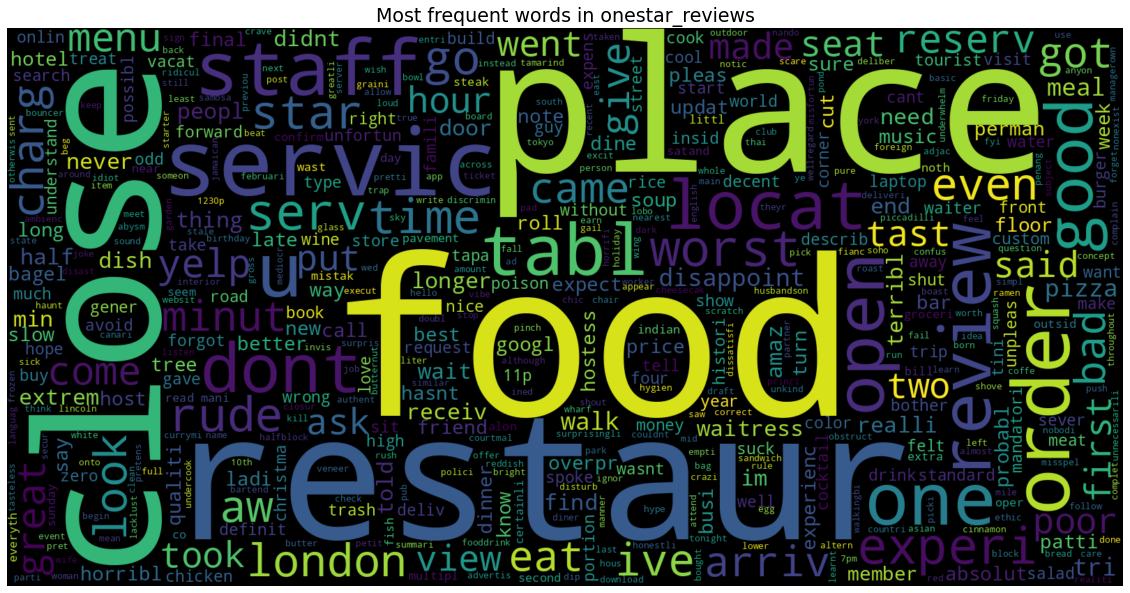

In [ ]:
text = ' '.join([word for word in onestar_reviews['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in onestar_reviews', fontsize = 19)
plt.show()

**splitting data**

In [ ]:
X = data['text']
Y = data['rating']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Term Frequency-Inverse Document Frequency model (TFIDF)
# It is used to convert text documents to matrix of tfidf features
vect = TfidfVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [ ]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2100, 4289)
Size of y_train:  (2100,)
Size of x_test:  (900, 4289)
Size of y_test:  (900,)


**Modeling & Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print("train score : ", lr.score(x_train, y_train))
print("test score : ", lr.score(x_test, y_test))
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(lr_pred, y_test)
print("Test accuracy: {:.2f}%".format(lr_acc*100))

train score :  0.7633333333333333
test score :  0.5233333333333333
Test accuracy: 52.33%


In [ ]:
lr_report=classification_report(y_test,lr_pred,target_names=['5','4','3','2','1'])
print(lr_report)

              precision    recall  f1-score   support

           5       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        23
           3       0.60      0.05      0.10       112
           2       0.41      0.35      0.38       285
           1       0.56      0.81      0.66       452

    accuracy                           0.52       900
   macro avg       0.32      0.24      0.23       900
weighted avg       0.49      0.52      0.47       900



In [ ]:
def cm (y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  cm_matrix = pd.DataFrame(data=cm, columns=['Actual:5', 'Actual:4','Actual:3','Actual:2','Actual:1'], 
                           index=['Predict:5','Predict:4', 'Predict:3', 'Predict:2', 'Predict:1'])
  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Text(0.5, 1.0, 'Confusion matrix of Logistic Regression')

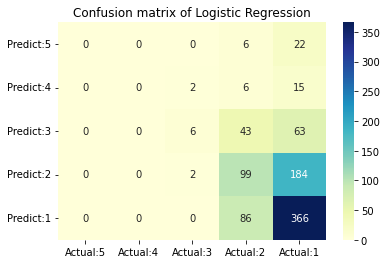

In [ ]:
cm(y_test,lr_pred)
plt.title('Confusion matrix of Logistic Regression')

In [ ]:
# Linear svm
lsvm = LinearSVC()
lsvm.fit(x_train, y_train)
print("train score : ", lsvm.score(x_train, y_train))
print("test score : ", lsvm.score(x_test, y_test))
lsvm_pred = lsvm.predict(x_test)
lsvm_acc = accuracy_score(lsvm_pred, y_test)
print("Test accuracy: {:.2f}%".format(lsvm_acc*100))

train score :  0.9833333333333333
test score :  0.49333333333333335
Test accuracy: 49.33%


In [ ]:
lsvm_report=classification_report(y_test,lsvm_pred,target_names=['5','4','3','2','1'])
print(lsvm_report)

              precision    recall  f1-score   support

           5       0.33      0.18      0.23        28
           4       0.17      0.04      0.07        23
           3       0.26      0.11      0.15       112
           2       0.37      0.36      0.37       285
           1       0.58      0.71      0.64       452

    accuracy                           0.49       900
   macro avg       0.34      0.28      0.29       900
weighted avg       0.46      0.49      0.47       900



Text(0.5, 1.0, 'Confusion matrix of LinearSVC')

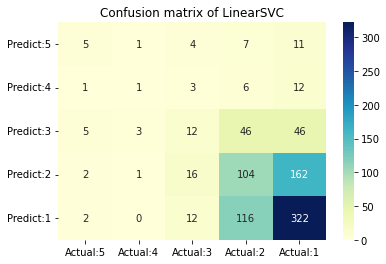

In [ ]:
cm(y_test,lsvm_pred)
plt.title('Confusion matrix of LinearSVC')

In [ ]:
# MultinomialNB
mn = MultinomialNB()
mn.fit(x_train, y_train)
print("train score : ", mn.score(x_train, y_train))
print("test score : ", mn.score(x_test, y_test))
mn_pred = mn.predict(x_test)
mn_acc = accuracy_score(mn_pred, y_test)
print("Test accuracy: {:.2f}%".format(mn_acc*100))

train score :  0.6133333333333333
test score :  0.5033333333333333
Test accuracy: 50.33%


In [ ]:
mn_report=classification_report(y_test,mn_pred,target_names=['5','4','3','2','1'])
print(mn_report)

              precision    recall  f1-score   support

           5       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        23
           3       0.00      0.00      0.00       112
           2       0.30      0.04      0.06       285
           1       0.51      0.98      0.67       452

    accuracy                           0.50       900
   macro avg       0.16      0.20      0.15       900
weighted avg       0.35      0.50      0.36       900



Text(0.5, 1.0, 'Confusion matrix of MultinomialNB')

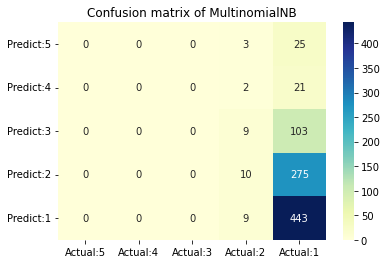

In [ ]:
cm(y_test,mn_pred)
plt.title('Confusion matrix of MultinomialNB')

In [ ]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("train score : ", dt.score(x_train, y_train))
print("test score : ", dt.score(x_test, y_test))
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(dt_pred, y_test)
print("Test accuracy: {:.2f}%".format(dt_acc*100))

train score :  1.0
test score :  0.43666666666666665
Test accuracy: 43.67%


In [ ]:
# comparison betweem different ml algorithms
comp = {'Algorithm': ['Logistic Regression', 'MultinomialNB','LinearSVC','DecisionTreeClassifier'], 'Test Accuracy': [lr_acc, mn_acc,lsvm_acc,dt_acc]}
pd.DataFrame(data=comp)

,Algorithm,Test Accuracy
0,Logistic Regression,0.523333
1,MultinomialNB,0.503333
2,LinearSVC,0.493333
3,DecisionTreeClassifier,0.436667


**NER**

In [ ]:
import spacy
import pandas as pd

In [ ]:
# Load the Spacy NER model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Define a function to preprocess the text
def preprocess_text(text):
    # Remove stopwords and punctuations
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [ ]:
# Define a function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [ ]:
# Preprocess the text in the dataframe
data['clean_text'] = data['text'].apply(preprocess_text)

In [ ]:
# Extract named entities from the preprocessed text
data['entities'] = data['clean_text'].apply(extract_entities)

In [ ]:
print(data['entities'])

0                                         [(london, GPE)]
1                   [(noon, TIME), (empti singl, PERSON)]
2       [(indian, NORP), (london, GPE), (indian, NORP)...
3                                                      []
4            [(2030, DATE), (friday, DATE), (6 pm, TIME)]
                              ...                        
2995                                                   []
2996                                     [(52, CARDINAL)]
2997                   [(second, ORDINAL), (london, GPE)]
2998                   [(london, GPE), (famou, CARDINAL)]
2999    [(everi, PERSON), (awesom origin chloe villag,...
Name: entities, Length: 3000, dtype: object


**Topic Analysis**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Load the dataset

# Preprocess the dataset
stop_words = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.lower() not in stop_words]))

# Tokenize the text
tokenized_text = [word_tokenize(review) for review in data['text']]

# Build a corpus
dictionary = corpora.Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Perform topic modeling using LDA
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10, random_state=42)

# Visualize the topics
topics = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)
for topic in topics:
    print('Topic {}: {}'.format(topic[0], [word[0] for word in topic[1]]))

# Compute the coherence score
coherence_model = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print('Coherence Score: {}'.format(coherence_score))

# Plot the coherence score
coherence_scores = []
for num_topics in range(2, 11):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    
plt.plot(range(2, 11), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()


Topic 0: ['food', 'great', 'place', 'servic', 'good', 'nice', 'realli', 'love', 'restaur', 'london']
Topic 1: ['place', 'food', 'love', 'good', 'like', 'order', 'london', 'chicken', 'pizza', 'nice']
Topic 2: ['place', 'restaur', 'london', 'food', 'walk', 'visit', 'time', 'tri', 'dinner', 'first']
Topic 3: ['good', 'ive', 'one', 'best', 'food', 'restaur', 'london', 'chicken', 'love', 'delici']
Topic 4: ['fish', 'place', 'chip', 'breakfast', 'london', 'came', 'eat', 'near', 'dinner', 'good']
Coherence Score: 0.2209605358948438


**2. Binary Classification**

**Loading Data**

In [ ]:
df = pd.read_csv(/content/IMDB Dataset.csv')

***Exploring Data***

In [ ]:
df.head()

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

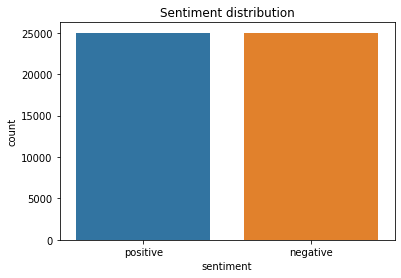

In [ ]:
sns.countplot(df['sentiment'])
plt.title("Sentiment distribution")

In [ ]:
# let's define function to count number of words in each review

def count_words(text):
  words = text.split()
  num_words = len(words)
  return num_words

In [ ]:
df['word count'] = df['review'].apply(count_words)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


Text(0.5, 1.0, 'Distrbution of negative reviews')

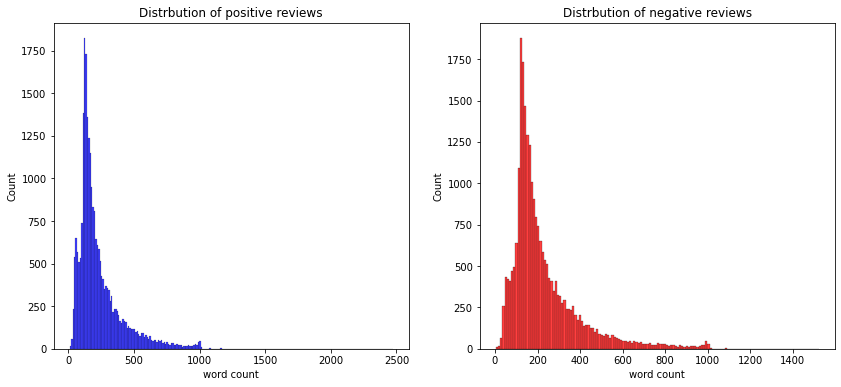

In [ ]:
# let's see the number of words for each sentiment
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.histplot(df[df['sentiment'] == 'positive']['word count'], ax=ax[0], color='blue')
ax[0].set_title('Distrbution of positive reviews')
sns.histplot(df[df['sentiment'] == 'negative']['word count'], ax=ax[1], color='red')
ax[1].set_title('Distrbution of negative reviews')

**Preprocessing**

In [ ]:
# encoding the sentiment
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [ ]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [ ]:
# define function to clean the reviews

def preprocess(text):
  soup = BeautifulSoup(text, "html.parser") #Removing the html strips
  text = soup.get_text()
  text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
  text = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*', "", text, flags = re.MULTILINE)  #Removing emails 
  text = re.sub('\[[^]]*\]', '', text)  #Removing the square brackets
  text = re.sub(r'[^a-zA-z0-9\s]', '', text)  #Removing special character and keep only words and numbers

  stop_words = set(stopwords.words('english'))
  punctuation = string.punctuation

  # Define a lemmatizer
  lemmatizer = nltk.WordNetLemmatizer()

  # Remove punctuation
  text = text.translate(str.maketrans('', '', punctuation))
  # Convert to lowercase
  text = text.lower()

  # Tokenize the text 
  text_tokens = word_tokenize(text)

  words = [w for w in text_tokens if not w in stop_words]  #Removing stop words

  # Lemmatize the words
  words = [lemmatizer.lemmatize(word) for word in words]

  new_text = " ".join(words)

  ps = nltk.porter.PorterStemmer()  #Stemming the text
  new_text = ' '.join([ps.stem(word) for word in new_text.split()])
  return new_text

In [ ]:
# let's see duplicated reviews if any before preprocessing
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  418


In [ ]:
# let's apply it on reviews
df.review = df['review'].apply(preprocess)

In [ ]:
# Define a tokenizer function that uses the preprocessed_text column
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Apply the tokenizer function to the preprocessed_text column
df['tokenized_text'] = df['review'].apply(tokenize_text)

# Define a lemmatizer
lemmatizer = nltk.WordNetLemmatizer()

# Define a function to lemmatize the tokens
def lemmatize_tokens(tokens):
    # Lemmatize the tokens
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmas

# Apply the lemmatizer to the tokenized_text column
df['lemmatized_tokens'] = df['tokenized_text'].apply(lemmatize_tokens)
# Save the updated DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Data/IMDB Dataset_updated.csv', index=False)

In [ ]:
# check duplicated after preprocessing
duplicated_count = df['review'].duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  423


In [ ]:
# let's drop all duplicated reviews
df = df.drop_duplicates('review')

In [ ]:
# let's count the words in each review again
df['new word count'] = df['review'].apply(count_words)

In [ ]:
df.head()

,review,sentiment,word count,tokenized_text,lemmatized_tokens,new word count
0,one review mention watch 1 oz episod youll hoo...,1,307,"[one, review, mention, watch, 1, oz, episod, y...","[one, review, mention, watch, 1, oz, episod, y...",168
1,wonder littl product film techniqu unassum old...,1,162,"[wonder, littl, product, film, techniqu, unass...","[wonder, littl, product, film, techniqu, unass...",84
2,thought wonder way spend time hot summer weeke...,1,166,"[thought, wonder, way, spend, time, hot, summe...","[thought, wonder, way, spend, time, hot, summe...",86
3,basic there famili littl boy jake think there ...,0,138,"[basic, there, famili, littl, boy, jake, think...","[basic, there, famili, littl, boy, jake, think...",67
4,petter mattei love time money visual stun film...,1,230,"[petter, mattei, love, time, money, visual, st...","[petter, mattei, love, time, money, visual, st...",125


In [ ]:
#word cloud for positive review words
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count,tokenized_text,lemmatized_tokens,new word count
0,one review mention watch 1 oz episod youll hoo...,1,307,"[one, review, mention, watch, 1, oz, episod, y...","[one, review, mention, watch, 1, oz, episod, y...",168
1,wonder littl product film techniqu unassum old...,1,162,"[wonder, littl, product, film, techniqu, unass...","[wonder, littl, product, film, techniqu, unass...",84
2,thought wonder way spend time hot summer weeke...,1,166,"[thought, wonder, way, spend, time, hot, summe...","[thought, wonder, way, spend, time, hot, summe...",86
4,petter mattei love time money visual stun film...,1,230,"[petter, mattei, love, time, money, visual, st...","[petter, mattei, love, time, money, visual, st...",125
5,probabl alltim favorit movi stori selfless sac...,1,119,"[probabl, alltim, favorit, movi, stori, selfle...","[probabl, alltim, favorit, movi, stori, selfle...",58


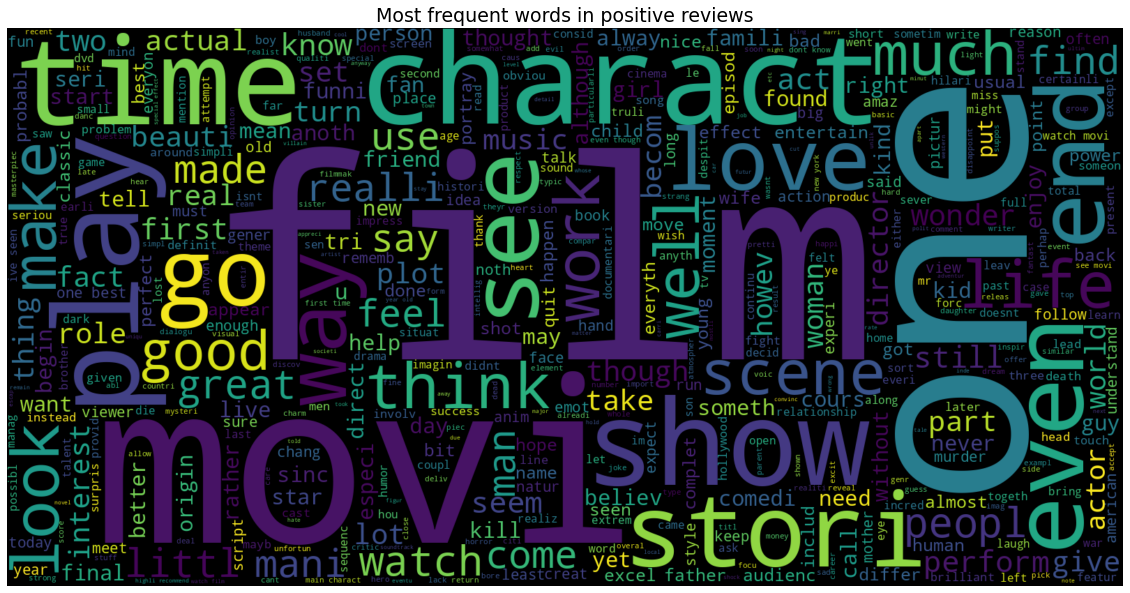

In [ ]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [ ]:
#word cloud for negitive review words
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,word count,tokenized_text,lemmatized_tokens,new word count
3,basic there famili littl boy jake think there ...,0,138,"[basic, there, famili, littl, boy, jake, think...","[basic, there, famili, littl, boy, jake, think...",67
7,show amaz fresh innov idea 70 first air first ...,0,174,"[show, amaz, fresh, innov, idea, 70, first, ai...","[show, amaz, fresh, innov, idea, 70, first, ai...",83
8,encourag posit comment film look forward watch...,0,130,"[encourag, posit, comment, film, look, forward...","[encourag, posit, comment, film, look, forward...",64
10,phil alien one quirki film humour base around ...,0,96,"[phil, alien, one, quirki, film, humour, base,...","[phil, alien, one, quirki, film, humour, base,...",51
11,saw movi 12 came recal scariest scene big bird...,0,180,"[saw, movi, 12, came, recal, scariest, scene, ...","[saw, movi, 12, came, recal, scariest, scene, ...",84


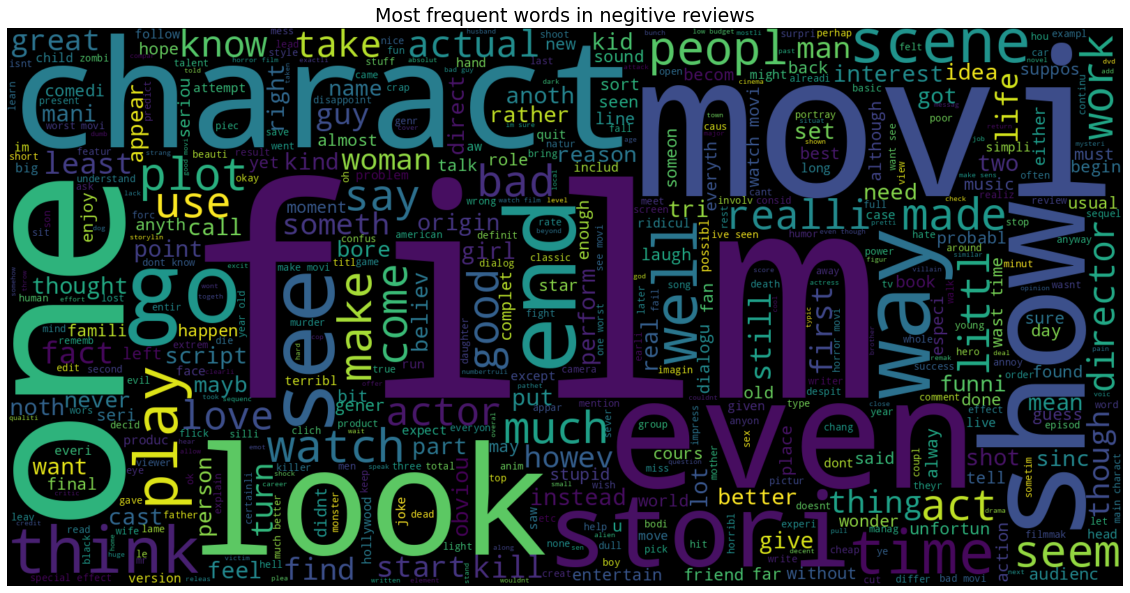

In [ ]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negitive reviews', fontsize = 19)
plt.show()

**Splitting data**


In [ ]:
X = df['review']
Y = df['sentiment']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Term Frequency-Inverse Document Frequency model (TFIDF)
# It is used to convert text documents to matrix of tfidf features
vect = TfidfVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [ ]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34703, 141830)
Size of y_train:  (34703,)
Size of x_test:  (14874, 141830)
Size of y_test:  (14874,)


**Modeling & Evaluation**

We will try different machine learning algrothims

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print("train score : ", lr.score(x_train, y_train))
print("test score : ", lr.score(x_test, y_test))
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(lr_pred, y_test)
print("Test accuracy: {:.2f}%".format(lr_acc*100))

train score :  0.9299484194450047
test score :  0.8872529245663574
Test accuracy: 88.73%


In [ ]:
lr_report=classification_report(y_test,lr_pred,target_names=['Positive','Negative'])
print(lr_report)

              precision    recall  f1-score   support

    Positive       0.90      0.87      0.88      7372
    Negative       0.88      0.90      0.89      7502

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [ ]:
def cm (y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                  index=['Predict Positive:1', 'Predict Negative:0'])
  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Text(0.5, 1.0, 'Confusion matrix of Logistic Regression')

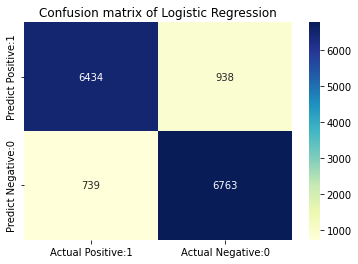

In [ ]:
cm(y_test,lr_pred)
plt.title('Confusion matrix of Logistic Regression')

In [ ]:
# Linear svm
lsvm = LinearSVC()
lsvm.fit(x_train, y_train)
print("train score : ", lsvm.score(x_train, y_train))
print("test score : ", lsvm.score(x_test, y_test))
lsvm_pred = lsvm.predict(x_test)
lsvm_acc = accuracy_score(lsvm_pred, y_test)
print("Test accuracy: {:.2f}%".format(lsvm_acc*100))

train score :  0.9877820361352044
test score :  0.8890681726502622
Test accuracy: 88.91%


In [ ]:
lsvm_report=classification_report(y_test,lsvm_pred,target_names=['Positive','Negative'])
print(lsvm_report)

              precision    recall  f1-score   support

    Positive       0.90      0.88      0.89      7372
    Negative       0.88      0.90      0.89      7502

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



Text(0.5, 1.0, 'Confusion matrix of LinearSVC')

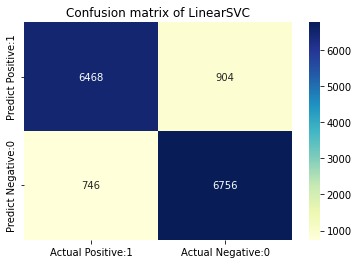

In [ ]:
cm(y_test,lsvm_pred)
plt.title('Confusion matrix of LinearSVC')

In [ ]:
# MultinomialNB
mn = MultinomialNB()
mn.fit(x_train, y_train)
print("train score : ", mn.score(x_train, y_train))
print("test score : ", mn.score(x_test, y_test))
mn_pred = mn.predict(x_test)
mn_acc = accuracy_score(mn_pred, y_test)
print("Test accuracy: {:.2f}%".format(mn_acc*100))

train score :  0.911765553410368
test score :  0.8563937071399758
Test accuracy: 85.64%


In [ ]:
mn_report=classification_report(y_test,mn_pred,target_names=['Positive','Negative'])
print(mn_report)

              precision    recall  f1-score   support

    Positive       0.85      0.86      0.86      7372
    Negative       0.86      0.85      0.86      7502

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



Text(0.5, 1.0, 'Confusion matrix of MultinomialNB')

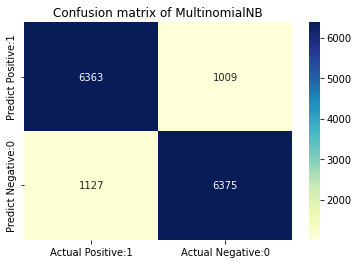

In [ ]:
cm(y_test,mn_pred)
plt.title('Confusion matrix of MultinomialNB')

In [ ]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("train score : ", dt.score(x_train, y_train))
print("test score : ", dt.score(x_test, y_test))
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(dt_pred, y_test)
print("Test accuracy: {:.2f}%".format(dt_acc*100))

train score :  1.0
test score :  0.7146698937743714
Test accuracy: 71.47%


In [ ]:
# comparison betweem different ml algorithms
comp = {'Algorithm': ['Logistic Regression', 'MultinomialNB','LinearSVC','DecisionTreeClassifier'], 'Test Accuracy': [lr_acc, mn_acc,lsvm_acc,dt_acc]}
pd.DataFrame(data=comp)

,Algorithm,Test Accuracy
0,Logistic Regression,0.887253
1,MultinomialNB,0.856394
2,LinearSVC,0.889068
3,DecisionTreeClassifier,0.714670


In [ ]:
import spacy
import pandas as pd

In [ ]:
# Load the Spacy NER model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Define a function to preprocess the text
def preprocess_text(text):
    # Remove stopwords and punctuations
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [ ]:
# Define a function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [ ]:
# Preprocess the text in the dataframe
df['clean_text'] = df['review'].apply(preprocess_text)

In [ ]:
# Extract named entities from the preprocessed text
df['entities'] = df['clean_text'].apply(extract_entities)

In [ ]:
# Print the entities for the first review
print(df['entities'])

0        [(1, CARDINAL), (exactli happen meth, PERSON),...
1        [(extrem chosen, PERSON), (michael sheen, PERS...
2        [(summer weekend, DATE), (2, CARDINAL), (fulli...
3        [(divorc argu, PERSON), (10, CARDINAL), (shot ...
4        [(arthur schnitzler, PERSON), (new york, GPE),...
                               ...                        
49995    [(lotta, GPE), (everi cent, MONEY), (sharon st...
49996    [(fourthrat, NORP), (jani joplin faint, PERSON...
49997    [(dian, NORP), (mari emot, PERSON), (besid, OR...
49998    [(maltin second, PERSON), (kick asid, PERSON),...
49999    [(unfortun movi, ORG), (muddl implaus, PERSON)...
Name: entities, Length: 49577, dtype: object
